# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [20]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [21]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

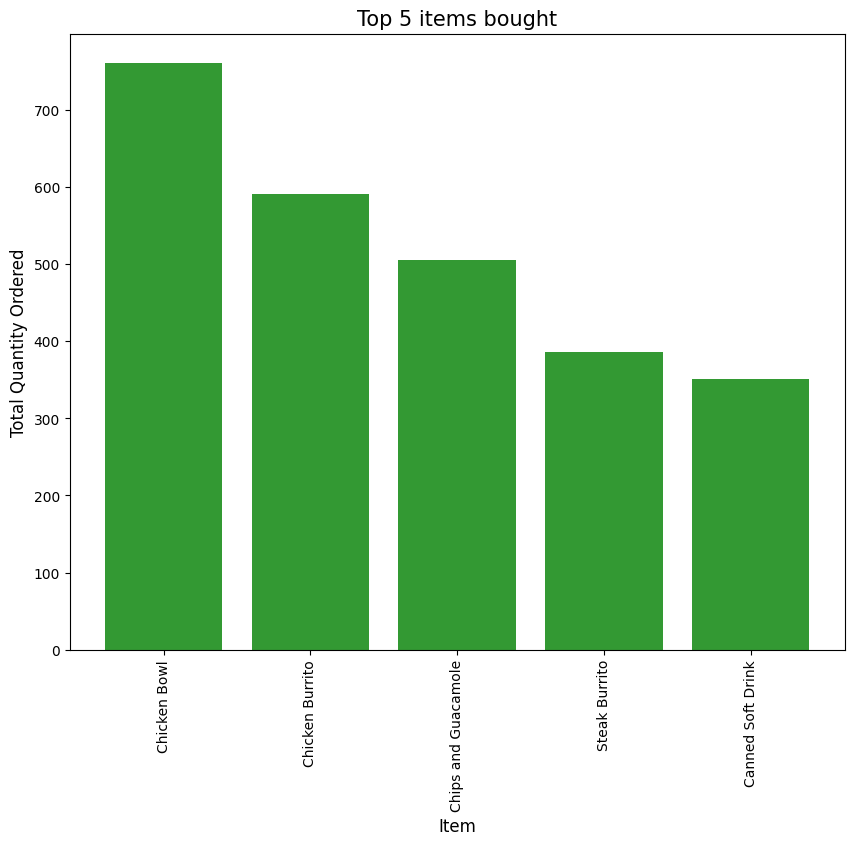

In [22]:
item_counts = chipo.groupby("item_name")["quantity"].sum()
top5 = item_counts.sort_values(ascending=False).head(5)

plt.figure(figsize=(10,8))
plt.bar(top5.index, top5.values, alpha=0.8, color="green")

plt.xlabel("Item", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.title("Top 5 items bought", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

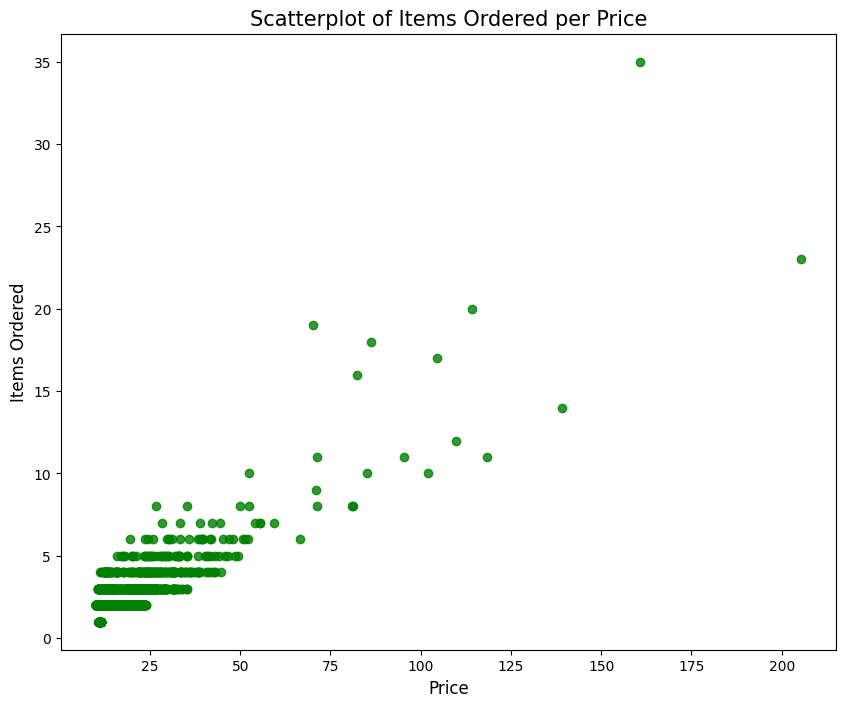

In [23]:
chipo["item_price"] = chipo["item_price"].str.replace("$","").astype(float)

order_price = chipo.groupby("order_id")["item_price"].sum()

order_quantity = chipo.groupby("order_id")["quantity"].sum()

plt.figure(figsize=(10,8))
plt.scatter(order_price, order_quantity, alpha=0.8, color="green")

plt.xlabel("Price", fontsize=12)
plt.ylabel("Items Ordered", fontsize=12)
plt.title("Scatterplot of Items Ordered per Price", fontsize=15)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

주문당 평균 가격이 가장 높은 아이템 상위 5개를 barplot으로 나타내기

/tmp/ipython-input-1787852495.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  item_avg_price = chipo.groupby("item_name").apply(


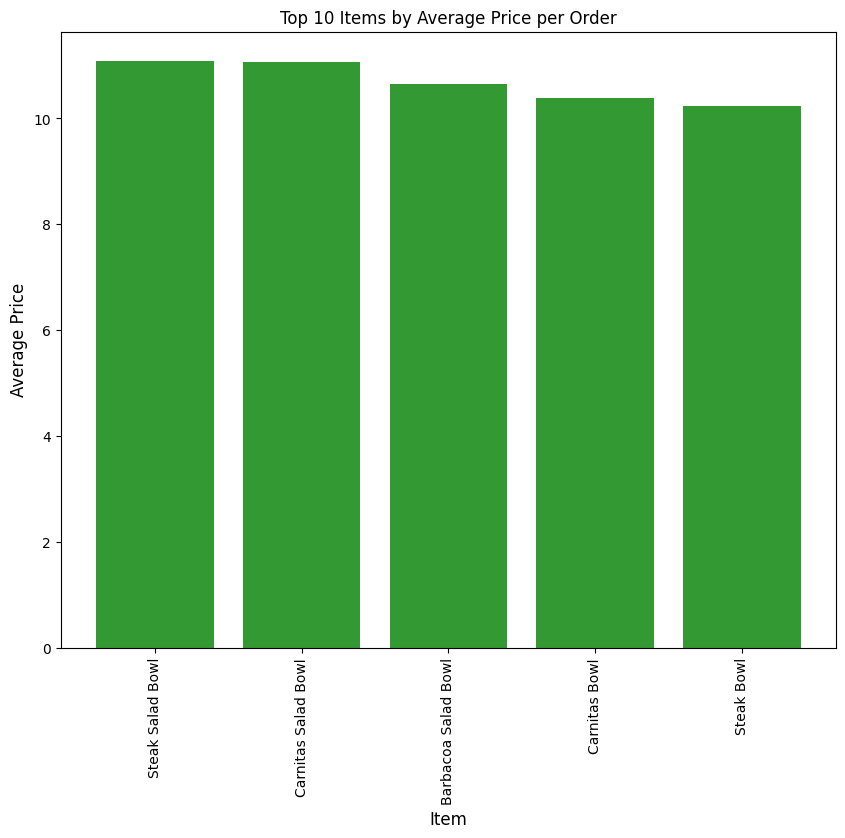

In [26]:
item_avg_price = chipo.groupby("item_name").apply(
    lambda x: x["item_price"].sum() / x["quantity"].sum()
)

top5_avg_price = item_avg_price.sort_values(ascending=False).head(5)

plt.figure(figsize=(10,8))
plt.bar(top5_avg_price.index, top5_avg_price.values, alpha=0.8, color="green")

plt.title("Top 10 Items by Average Price per Order")
plt.ylabel("Average Price", fontsize=12)
plt.xlabel("Item", fontsize=12)
plt.xticks(rotation='vertical')
plt.show()